In [284]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv("bitcoin_v2.csv")
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dataset

,date,confirmation_time,difficulty,hash_rate,market_cap,price_usd,total_block_size,total_miner_revenue,total_supply,total_trx_fees,trade_volume,transactions,trx_cost_percent,trx_per_block,trx_volume,unique_addresses,daily_return
0,2015-01-01,7.150000,4.064096e+10,3.353653e+05,4.317111e+09,315.70000,27835.0000,1312680.60,13674725.0,8.003076,5.553875e+06,58963,5.244721,555.000000,79280.0000,116012,0
1,2015-01-02,6.933333,4.064096e+10,3.232437e+05,4.324529e+09,316.15000,27875.0000,1267761.50,13678725.0,10.727695,6.440896e+06,72234,4.477312,627.000000,89563.0000,168563,0
2,2015-01-03,6.433333,4.064096e+10,3.313247e+05,4.136728e+09,302.33000,27922.0000,1242878.63,13682825.0,11.906088,2.938312e+07,82832,2.277049,734.000000,180541.0000,207571,0
3,2015-01-04,8.033333,4.064096e+10,3.353653e+05,3.708212e+09,270.93000,27971.0000,1129778.10,13686975.0,20.288107,5.310479e+07,85570,1.376066,692.000000,303038.0000,206228,0
4,2015-01-05,6.816667,4.064096e+10,3.394058e+05,3.789717e+09,276.80000,28024.0000,1166988.80,13691175.0,16.967084,3.132672e+07,93753,1.863192,751.000000,226278.0000,193982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,2017-12-27,8.133333,1.873110e+12,1.452556e+07,2.613810e+11,15589.32167,148457.8829,41529952.92,16766700.0,784.817123,1.619269e+09,307642,0.908155,1972.064103,301139.8528,749191,0
1089,2017-12-28,9.800000,1.873110e+12,1.387377e+07,2.411420e+11,14380.58167,148619.2801,37008426.92,16768562.5,785.833892,1.883494e+09,305053,1.052555,2047.335570,251609.9899,741488,0
1090,2017-12-29,8.066667,1.873110e+12,1.536358e+07,2.455240e+11,14640.14000,148792.1595,40531227.59,16770625.0,785.795050,1.274049e+09,353824,1.132235,2144.387879,251563.8573,838925,0
1091,2017-12-30,10.700000,1.873110e+12,1.368755e+07,2.216580e+11,13215.57400,148944.5812,33640243.62,16772462.5,778.571110,1.728482e+09,344407,0.876878,2342.904762,298339.3935,815099,0


# Slicing out our data

In [285]:
dataset = dataset.iloc[:, 5:6].values
dataset.shape

(1093, 1)

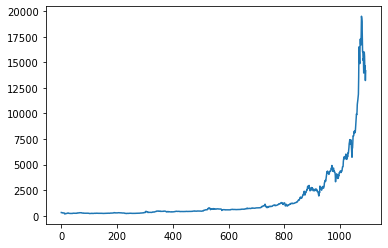

In [286]:
plt.plot(dataset)
plt.show()

In [287]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Normalize

In [288]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split 80/20

In [289]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [290]:
train_size

874

In [291]:
test_size

219

# Function to lookback

In [292]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Reshape

In [293]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]

In [294]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [295]:
from keras.layers import Dropout

# Creating the model

# Model type#1

In [275]:
model = Sequential()

model.add(LSTM(4, input_shape=(look_back, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
870/870 - 6s - loss: 4.4581e-04 - 6s/epoch - 7ms/step
Epoch 2/100
870/870 - 3s - loss: 1.2024e-04 - 3s/epoch - 4ms/step
Epoch 3/100
870/870 - 3s - loss: 5.8188e-06 - 3s/epoch - 4ms/step
Epoch 4/100
870/870 - 3s - loss: 2.9458e-06 - 3s/epoch - 3ms/step
Epoch 5/100
870/870 - 3s - loss: 3.1423e-06 - 3s/epoch - 4ms/step
Epoch 6/100
870/870 - 3s - loss: 3.5989e-06 - 3s/epoch - 3ms/step
Epoch 7/100
870/870 - 3s - loss: 3.6946e-06 - 3s/epoch - 3ms/step
Epoch 8/100
870/870 - 3s - loss: 3.5128e-06 - 3s/epoch - 3ms/step
Epoch 9/100
870/870 - 3s - loss: 3.6452e-06 - 3s/epoch - 3ms/step
Epoch 10/100
870/870 - 3s - loss: 3.6182e-06 - 3s/epoch - 3ms/step
Epoch 11/100
870/870 - 3s - loss: 3.3886e-06 - 3s/epoch - 3ms/step
Epoch 12/100
870/870 - 3s - loss: 3.6946e-06 - 3s/epoch - 3ms/step
Epoch 13/100
870/870 - 3s - loss: 3.2169e-06 - 3s/epoch - 4ms/step
Epoch 14/100
870/870 - 3s - loss: 3.5616e-06 - 3s/epoch - 3ms/step
Epoch 15/100
870/870 - 3s - loss: 3.2873e-06 - 3s/epoch - 3ms/step
Epoc

# Make Prediction

In [276]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert Prediction

In [277]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

In [278]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Root Mean Squared Error

In [279]:
trainScoreM1 = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScoreM1))
testScoreM1 = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScoreM1))

Train Score: 22.06 RMSE
Test Score: 869.63 RMSE


# Plot

In [280]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Test prediction for plotting

In [281]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# Compare baseline & Prediction

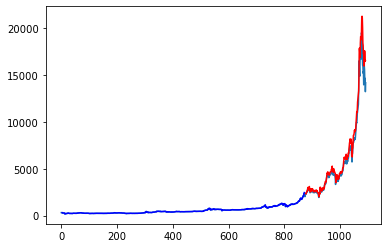

In [282]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, color= 'blue')
plt.plot(testPredictPlot, color= 'red')
plt.show()

## Model#2

In [296]:
model2 = Sequential()

batch_size = 5

#input layer
model2.add(LSTM(50, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))

#hidden layer1
model2.add(LSTM(30, batch_input_shape=(batch_size, look_back, 1), stateful=True))

#output layer
model2.add(Dense(1))

#compile
model2.compile(loss='mean_squared_error', optimizer='adam')

#for i in range(100):
model2.fit(testX, testY, epochs=27, batch_size=batch_size, verbose=2)
    #model.reset_states()

Epoch 1/27
43/43 - 6s - loss: 0.0563 - 6s/epoch - 132ms/step
Epoch 2/27
43/43 - 0s - loss: 0.0332 - 261ms/epoch - 6ms/step
Epoch 3/27
43/43 - 0s - loss: 0.0162 - 316ms/epoch - 7ms/step
Epoch 4/27
43/43 - 0s - loss: 0.0066 - 356ms/epoch - 8ms/step
Epoch 5/27
43/43 - 0s - loss: 0.0035 - 280ms/epoch - 7ms/step
Epoch 6/27
43/43 - 0s - loss: 0.0024 - 261ms/epoch - 6ms/step
Epoch 7/27
43/43 - 0s - loss: 0.0021 - 342ms/epoch - 8ms/step
Epoch 8/27
43/43 - 0s - loss: 0.0018 - 296ms/epoch - 7ms/step
Epoch 9/27
43/43 - 0s - loss: 0.0016 - 360ms/epoch - 8ms/step
Epoch 10/27
43/43 - 0s - loss: 0.0016 - 304ms/epoch - 7ms/step
Epoch 11/27
43/43 - 0s - loss: 0.0018 - 251ms/epoch - 6ms/step
Epoch 12/27
43/43 - 0s - loss: 0.0016 - 282ms/epoch - 7ms/step
Epoch 13/27
43/43 - 0s - loss: 0.0014 - 312ms/epoch - 7ms/step
Epoch 14/27
43/43 - 0s - loss: 0.0014 - 477ms/epoch - 11ms/step
Epoch 15/27
43/43 - 0s - loss: 0.0017 - 298ms/epoch - 7ms/step
Epoch 16/27
43/43 - 0s - loss: 0.0011 - 353ms/epoch - 8ms/step
E

# Prediction

In [297]:
trainPredict2 = model2.predict(trainX, batch_size=batch_size)
#model.reset_states()
testPredict2 = model2.predict(testX, batch_size=batch_size)

# Invert Prediction

In [298]:
trainPredict2 = scaler.inverse_transform(trainPredict2)
trainY = scaler.inverse_transform([trainY])
testPredict2 = scaler.inverse_transform(testPredict2)
testY = scaler.inverse_transform([testY])

# RMSE

In [299]:
trainScoreM2 = math.sqrt(mean_squared_error(trainY[0], trainPredict2[:,0]))
print('Train Score: %.2f RMSE' % (trainScoreM2))
testScoreM2 = math.sqrt(mean_squared_error(testY[0], testPredict2[:,0]))
print('Test Score: %.2f RMSE' % (testScoreM2))

Train Score: 577.96 RMSE
Test Score: 597.29 RMSE


# Plot

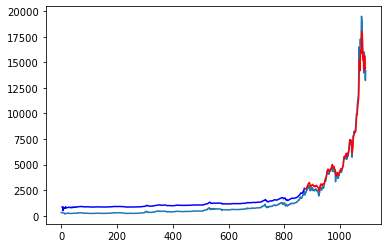

In [301]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict2)+look_back, :] = trainPredict2

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict2)+(look_back*2)+1:len(dataset)-1, :] = testPredict2

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, color= 'blue')
plt.plot(testPredictPlot, color= 'red')
plt.show()

In [242]:
testX.shape

(215, 3, 1)

# Future Prediction

# Walk forward

In [243]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size = batch_size)
    return yhat[0,0]

In [245]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(testX)):
    
    # make one-step forecast
    X, y = testX[i, 0:-1], testY[i, -1]
    yhat = forecast_lstm(model, 1, X)
    
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

ValueError: in user code:

    File "/Users/Fatima/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1730, in predict_function  *
        return step_function(self, iterator)
    File "/Users/Fatima/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1719, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/Fatima/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1712, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/Fatima/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1680, in predict_step
        return self(x, training=False)
    File "/Users/Fatima/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/Fatima/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_16" is incompatible with the layer: expected shape=(None, 3, 1), found shape=(None, 1, 2)
